У Насти ошибка в подсчёте плотности и в подсчете соседей

3. Вычисление среднего кластерного коэффициента сети для наибольшей компоненты слабой связности.

In [ ]:
! pip install tqdm

In [ ]:
import itertools
import numpy as np
from tqdm import tqdm

In [ ]:
def adj_cvc_graph(graph, cvc):
  cc = graph.loc[graph.v1.isin(cvc) & graph.v2.isin(cvc)]
  cc = cc.reset_index()[['v1', 'v2']]
  cc = cc.drop_duplicates(keep='first')

  v1 = cc.v1.to_list()
  v2 = cc.v2.to_list()
  
  V1 = np.array(v1 + v2)
  V2 = np.array(v2 + v1)
  
  CC = pd.DataFrame(np.array([V1, V2]).transpose(),columns=['v1', 'v2'])
  CC = CC.drop_duplicates(keep='first')
  
  return CC

In [ ]:
def get_neighbors(adj, nodes):
  # node_neighbors = dict()

  # for node in tqdm(nodes):
  #   node_neighbors[node] = adj[adj.v1 == node].v2.to_list()

  # return node_neighbors
  
  node_neighbors = defaultdict(set)
  for edge in tqdm(edges):
      node_neighbors[edge[0]].add(edge[1])
      node_neighbors[edge[1]].add(edge[0])

  return node_neighbors

In [ ]:
def get_acc(graph, cvc):
#graph - dataframe (v1 v2 weight timestamp)
#cvc - component of weak connectivity (list)
#acc - average cluster coefficient
  acc = 0
  n = len(cvc)

  adj = adj_cvc_graph(graph, cvc)
  nodes = adj.v1.unique()
  node_neighbors = get_neighbors(adj, nodes)

  for u in tqdm(cvc):
    deg = len(node_neighbors[u])
    if deg <= 1: continue
    
    # l_u = adj.loc[adj.v1.isin(node_neighbors[u]) & adj.v2.isin(node_neighbors[u])].shape[0]    
    l_u = np.sum([len(set.intersection(node_neighbors[v], node_neighbors[u])) for v in node_neighbors[u]]) / 2
    
    acc += (2 * l_u) / (deg * (deg-1))

  return float(acc) / n

4. Коэффициент ассортативности по степени вершин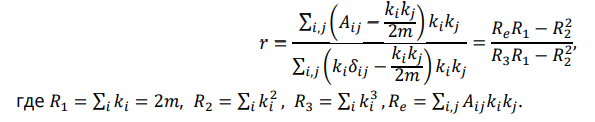

In [ ]:
import math
import pandas as pd

In [ ]:
def adj_graph(graph, need_time=False)
  cc = graph
  cc = cc.reset_index()[['v1', 'v2']]
  cc = cc.drop_duplicates(keep='first')

  v1 = cc.v1.to_list()
  v2 = cc.v2.to_list()

  V1 = np.array(v1 + v2)
  V2 = np.array(v2 + v1)

  # if need_time:
  #   timestamp = cc.timestamp.to_list()
  #   TIMESTAMP = np.array(timestamp + timestamp)
  
  CC = pd.DataFrame(np.array([V1, V2]).transpose(),columns=['v1', 'v2'])
  CC = CC.drop_duplicates(keep='first')
  
  return CC

In [ ]:
def get_neighbors(adj, nodes):
  node_neighbors = dict()

  for node in nodes:
    node_neighbors[node] = adj[adj.v1 == node].v2.to_list()

  return node_neighbors

In [ ]:
def get_pcc(graph):
#graph - dataframe (v1 v2 weight timelable)
#pcc - Pearson correlation coefficient.
  adj = adj_graph(graph)
  nodes = adj.v1.unique()
  node_neighbors = get_neighbors(adj, nodes)

  r_1 = adj.shape[0]
  r_2 = 0
  r_3 = 0
  r_e = 0
  for u in tqdm(nodes):
    k = len(node_neighbors[u])
    r_2 += math.pow(k, 2)
    r_3 += math.pow(k, 3)
    for v in node_neighbors[u]:
      r_e += len(node_neighbors[u]) * len(node_neighbors[v])
  
  r = float((r_e * r_1 - math.pow(r_2, 2))) / (r_3 * r_1 - math.pow(r_2, 2))

  return r

In [ ]:
print(get_acc(graph, cvc))
print('\n')
print(get_pcc(graph))

**Второе задание. Предсказания появления ребер в графе**

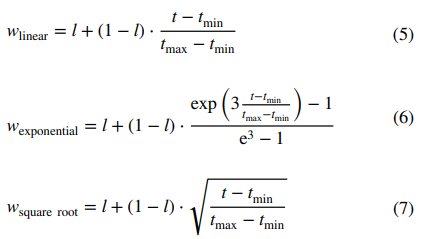

In [ ]:
def get_sub_f(t, t_min, delta_t):
  return (t - t_min) / delta_t

def get_w_lin(l, sub_f):
  return l + (1 - l) * sub_f

def get_w_exp(l, sub_f):
  return l + (1 - l) * (math.exp(3 * sub_f) - 1) / (math.pow(math.exp, 3) - 1)

def get_w_sqrt(l, sub_f):
  return l + (1 - l) * math.sqrt(sub_f)


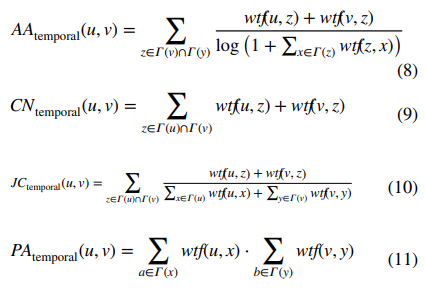

In [ ]:
def wtf(u, v):
  # КУЧА ВОПРОСОВ ВООБЩЕ НЕПОНЯТНАЯ ФОРМУЛА!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  # КУЧА ВОПРОСОВ ВООБЩЕ НЕПОНЯТНАЯ ФОРМУЛА!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  # КУЧА ВОПРОСОВ ВООБЩЕ НЕПОНЯТНАЯ ФОРМУЛА!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  # чё делать?
  return 0

def get_aa_temp(u, v, wtf, node_neigbors):
  result = 0
  for z in node_neigbors[u] | node_neigbors[v]:
    result += (wtf(u, z) + wtf(v, z)) / math.log(1 + sum([wtf(z, x) for x in node_neigbors[z]]))

  return result

def get_cn_temp(u, v, wtf, node_neigbors):
  result = 0
  for z in node_neigbors[u] | node_neigbors[v]:
    result += wtf(u, z) + wtf(v, z)

  return result

def get_jc_temp(u, v, wtf, node_neigbors):
  result = 0
  for z in node_neigbors[u] | node_neigbors[v]:
    result += (wtf(u, z) + wtf(v, z)) / (sum([wtf(u, x) for x in node_neigbors[u]]) + sum([wtf(v, y) for y in node_neigbors[v]]))

  return result

def get_pa_temp(u, v, wtf, node_neigbors):
  # КУЧА ВОПРОСОВ ВООБЩЕ НЕПОНЯТНАЯ ФОРМУЛА ИНДЕКСЫ НЕ ТЕ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  # КУЧА ВОПРОСОВ ВООБЩЕ НЕПОНЯТНАЯ ФОРМУЛА ИНДЕКСЫ НЕ ТЕ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  # КУЧА ВОПРОСОВ ВООБЩЕ НЕПОНЯТНАЯ ФОРМУЛА ИНДЕКСЫ НЕ ТЕ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  tmp1 = 0
  for x in node_neigbors[u]:
    tmp1 += wtf(u, x)
  tmp2 = 0
  for y in node_neigbors[v]:
    tmp2 += wtf(v, y)

  return tmp1 * tmp2


In [ ]:
from collections import defaultdict
from copy import deepcopy

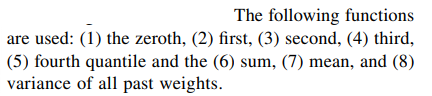

In [ ]:
def get_zeroth(w):
  return w[0]

def get_first(w):
  indx = math.floor(len(w) / 4)
  return w[indx]

def get_second(w):
  indx = len(w) // 2
  if len(w) % 2:
    return w[indx]
  else:
    return (w[indx] + w[indx - 1]) / 2

def get_third(w):
  indx = math.floor(len(w) * 3 / 4)
  return w[indx]

def get_fourth(w):
  return w[-1]

def get_sum(w):
  return np.sum(np.array(w))

def get_mean(w):
  return np.mean(np.array(w))

def get_variance(w):
  return weighted_avg_and_std(w)

In [ ]:
def weighted_avg_and_std(weights):
  # КУЧА ВОПРОСОВ ВООБЩЕ НЕПОНЯТНАЯ ФОРМУЛА ВРОДЕ БЫ СЧИТАЕТ variance!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  # КУЧА ВОПРОСОВ ВООБЩЕ НЕПОНЯТНАЯ ФОРМУЛА ВРОДЕ БЫ СЧИТАЕТ variance!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  # КУЧА ВОПРОСОВ ВООБЩЕ НЕПОНЯТНАЯ ФОРМУЛА ВРОДЕ БЫ СЧИТАЕТ variance!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    """
    Return the weighted average and standard deviation.
    values, weights -- NumPy ndarrays with the same shape.
    """
    average = np.average(weights, weights=weights)
    # Fast and numerically precise:
    variance = np.average((weights-average)**2, weights=weights)
    return math.sqrt(variance)

In [ ]:
# 4.1.3
all_nodes = np.sort(adj_graph(graph).v1.unique())
print(all_nodes)

posibility_edges = itertools.combinations_with_replacement(all_nodes, 2)
temporal_weighting = {'w_lin': list(), 'w_exp': list(), 'w_sqrt': list()}
quantiles_plus = {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}
сombining = {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}

params = {'lin': {'w_lin': list(), 'quant_p': deepcopy(quantiles_plus)},
          'exp': {'w_exp': list(), 'quant_p': deepcopy(quantiles_plus)},
          'sqrt': {'w_sqrt': list(), 'quant_p': deepcopy(quantiles_plus)}} 

params2 = {'zeroth': deepcopy(сombining), 'first': deepcopy(сombining), 
           'second': deepcopy(сombining), 'third': deepcopy(сombining), 
           'fourth': deepcopy(сombining), 'sum': deepcopy(сombining), 
           'mean': deepcopy(сombining)}
           
params3 = {'lin': deepcopy(params2), 'exp': deepcopy(params2), 'sqrt': deepcopy(params2)}

edges_with_params = defaultdict(None)
nodes_with_params = defaultdict(None)
edges_with_сombining = defaultdict(None)
for edge in tqdm(edges):
  edges_with_params[edge] = deepcopy(temporal_weighting)
for node in tqdm(all_nodes):
  nodes_with_params[node] = deepcopy(params)
for edge in tqdm(edges):
  edges_with_сombining[edges] = deepcopy(params3)

In [ ]:
# 4.1.2
all_nodes = np.sort(adj_graph(graph).v1.unique())
print(all_nodes)

posibility_edges = itertools.combinations_with_replacement(all_nodes, 2)
temporal_weighting = {'w_lin': list(), 'w_exp': list(), 'w_sqrt': list()}
quantiles_plus = {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0, 'variance': list()}
weighted_topological_features = {'aa_temp': 0, 'cn_temp': 0, 'jc_temp': 0, 'pa_temp': 0}

params = {'lin': {'w_lin': list(), 'quant_p': deepcopy(quantiles_plus), 'features': deepcopy(weighted_topological_features)},
          'exp': {'w_exp': list(), 'quant_p': deepcopy(quantiles_plus), 'features': deepcopy(weighted_topological_features)},
          'sqrt': {'w_sqrt': list(), 'quant_p': deepcopy(quantiles_plus), 'features': deepcopy(weighted_topological_features)}} 

edges_with_params = defaultdict(None)
for edge in tqdm(edges):
  edges_with_params[edge] = deepcopy(params)

In [ ]:
def time_normalization(timestemp, t_min, delta_t):
  return (timestemp - t_min) / delta_t

In [ ]:
l = 0.2
t_min = graph.timestamp.min()
t_max = graph.timestamp.max()
delta_t = t_max - t_min

df1 = df1.sort_values(by=['timestamp'])

In [ ]:
# 4.1.3
def get_temporal_weighting(graph, edges_with_params):
  for _, edge in tqdm(graph.iterrows()):
    params = edges_with_params[(min(edge.v1, edge.v2), max(edge.v1, edge.v2))]

    norm_t = time_normalization(edge.timestamp, t_min, delta_t)
    sub_f = get_sub_f(norm_t, 0, 1)

    params['w_lin'].append(get_w_lin(l, sub_f))
    params['w_exp'].append(get_w_exp(l, sub_f))
    params['w_sqrt'].append(get_w_sqrt(l, sub_f))


In [ ]:
# 4.1.2
def get_temporal_weighting(graph, edges_with_params):
  for _, edge in tqdm(graph.iterrows()):
    params = edges_with_params[(min(edge.v1, edge.v2), max(edge.v1, edge.v2))]

    norm_t = time_normalization(edge.timestamp, t_min, delta_t)
    sub_f = get_sub_f(norm_t, 0, 1)

    params['lin']['w_lin'].append(get_w_lin(l, sub_f))
    params['exp']['w_exp'].append(get_w_exp(l, sub_f))
    params['sqrt']['w_sqrt'].append(get_w_sqrt(l, sub_f))

In [ ]:
# 4.1.3
def fill_nodes(edges_with_params, nodes_with_params):
  for key in tqdm(edges_with_params):
    params = edges_with_params[key]
    u, v = key

    for w_type in ['lin', 'exp', 'sqrt']:
      nodes_with_params[u][w_type]['w_' + w_type].append(params['w_' + w_type])
      nodes_with_params[v][w_type]['w_' + w_type].append(params['w_' + w_type])

    params = None #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

  for key in tqdm(nodes_with_params):
    for w_type in ['lin', 'exp', 'sqrt']:
      nodes_with_params[key][w_type]['w_' + w_type].sort()


In [ ]:
# 4.1.3
# temporal_weighting = {'w_lin': list(), 'w_exp': list(), 'w_sqrt': list()}
# quantiles_plus = {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0}
# сombining = {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}

def quantiles_plus(edges_with_params, nodes_with_params):
  fill_nodes(edges_with_params, nodes_with_params)

  for key in tqdm(nodes_with_params):
    params = nodes_with_params[key]

    for w_type in ['lin', 'exp', 'sqrt']:
      tmp = params[w_type]
      tmp2 = params[w_type]['w_' + w_type]

      tmp['quant_p']['zeroth'] = get_zeroth(tmp2)
      tmp['quant_p']['first'] = get_first(tmp2)
      tmp['quant_p']['second'] = get_second(tmp2)
      tmp['quant_p']['third'] = get_third(tmp2)
      tmp['quant_p']['fourth'] = get_fourth(tmp2)
      tmp['quant_p']['sum'] = get_sum(tmp2)
      tmp['quant_p']['mean'] = get_mean(tmp2)

In [ ]:
# 4.1.2
# temporal_weighting = {'w_lin': list(), 'w_exp': list(), 'w_sqrt': list()}
# quantiles_plus = {'zeroth': 0, 'first': 0, 'second': 0, 'third': 0, 'fourth': 0, 'sum': 0, 'mean': 0, 'variance': list()}
# weighted_topological_features = {'aa_temp': 0, 'cn_temp': 0, 'jc_temp': 0, 'pa_temp': 0}

def proposed_approach(edges_with_params):
  for key in tqdm(edges_with_params):
    params = edges_with_params[key]

    for w_type in ['lin', 'exp', 'sqrt']:
      tmp = params[w_type]
      tmp2 = params[w_type]['w_' + w_type]

      tmp['quant_p']['zeroth'] = get_zeroth(tmp2)
      tmp['quant_p']['first'] = get_first(tmp2)
      tmp['quant_p']['second'] = get_second(tmp2)
      tmp['quant_p']['third'] = get_third(tmp2)
      tmp['quant_p']['fourth'] = get_fourth(tmp2)
      tmp['quant_p']['sum'] = get_sum(tmp2)
      tmp['quant_p']['mean'] = get_mean(tmp2)
      tmp['quant_p']['variance'] = get_variance(tmp2)

In [ ]:
# сombining = {'sum': 0, 'abs_diff': 0, 'min': 0, 'max': 0}

def get_sum(a, b):
  return a + b
  
def get_abs_diff(a, b):
  return math.abs(a - b)
  
def get_min(a, b):
  return min(a, b)
  
def get_max(a, b):
  return max(a, b)

In [ ]:
# 4.1.3
# params2 = {'zeroth': deepcopy(сombining), 'first': deepcopy(сombining), 
#            'second': deepcopy(сombining), 'third': deepcopy(сombining), 
#            'fourth': deepcopy(сombining), 'sum': deepcopy(сombining), 
#            'mean': deepcopy(сombining)}

def combining_node_activity(edges_with_сombining, nodes_with_params):
  for key in edges_with_combining:
    u, v = key

    for w_type in ['lin', 'exp', 'sqrt']:
      edge = edges_with_combining[key][w_type]
      u_node = nodes_with_params[u][w_type]
      v_node = nodes_with_params[v][w_type]
    
      for p_type in ['zeroth', 'first', 'second', 'third', 'fourth', 'sum', 'mean']:
        p_edge = edge[p_type]
        p_u_node = u_node[p_type]
        p_v_node = v_node[p_type]
        p_edge['sum'] = get_sum(p_u_node, p_v_node) 
        p_edge['abs_dif'] = get_abs_dif(p_u_node, p_v_node) 
        p_edge['min'] = get_min(p_u_node, p_v_node) 
        p_edge['max'] = get_max(p_u_node, p_v_node) 

In [ ]:
get_temporal_weighting(graph, edges_with_params)
edges_with_params

In [ ]:
proposed_approach(nodes_with_params)
nodes_with_params

**ТУТ ОБУЧЕНИЕ, НО ПОКА ПРОСТО ФИГНЯ**

https://medium.com/nuances-of-programming/пошаговое-построение-логистической-регрессии-в-python-a7c650ae77c2

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 96)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

In [ ]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()